In [12]:
# Imports

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import joblib
import os

from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor




In [ ]:
import sklearn
print(sklearn.__version__)
exit()

1.5.1


: 

Processando intervalo 1...
Estatísticas Descritivas:


,project_id,group_id,mention_handle,interval,total_commits,sum_lines_added,sum_lines_deleted,sum_lines_per_commit,active_days,last_minute_commits,...,merged_requests,review_comments_given,review_comments_received,total_issues_created,total_issues_assigned,issues_resolved,issue_participation,branches_created,merges_to_main_branch,Final Grade
count,1.860000e+02,1.860000e+02,186,186.0,186.000000,186.000000,186.000000,186.000000,186.000000,186.0,...,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000
unique,NaN,NaN,181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,mpintodacunha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5.536923e+07,8.235672e+07,NaN,1.0,1.725806,23.166667,1.177419,24.344086,0.489247,0.0,...,0.521505,3.543011,3.596774,1.478495,1.295699,1.473118,2.537634,36.860215,16.059140,13.672043
std,5.567724e+06,9.589986e+06,NaN,0.0,4.014175,76.239801,5.559091,79.376284,1.056456,0.0,...,0.691313,10.477816,6.200592,1.840115,1.004682,1.840043,3.720096,37.123488,15.658578,3.085270
min,5.052158e+07,7.404790e+07,NaN,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,5.055425e+07,7.404790e+07,NaN,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,4.000000,12.000000
50%,5.055433e+07,7.404790e+07,NaN,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.500000,0.000000,1.000000,1.000000,1.000000,1.500000,11.000000,6.000000,15.000000
75%,6.176088e+07,9.336591e+07,NaN,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,1.000000,3.000000,5.000000,2.000000,2.000000,2.000000,3.000000,81.000000,32.000000,16.000000


Valores em falta por coluna:
project_id                  0
group_id                    0
mention_handle              0
interval                    0
total_commits               0
sum_lines_added             0
sum_lines_deleted           0
sum_lines_per_commit        0
active_days                 0
last_minute_commits         0
total_merge_requests        0
merged_requests             0
review_comments_given       0
review_comments_received    0
total_issues_created        0
total_issues_assigned       0
issues_resolved             0
issue_participation         0
branches_created            0
merges_to_main_branch       0
Final Grade                 0
dtype: int64
Correlação com Final Grade:
Final Grade                 1.000000
total_issues_assigned       0.274799
total_issues_created        0.219641
issues_resolved             0.217435
issue_participation         0.175767
group_id                    0.151545
project_id                  0.151340
total_merge_requests        0.094247
merg

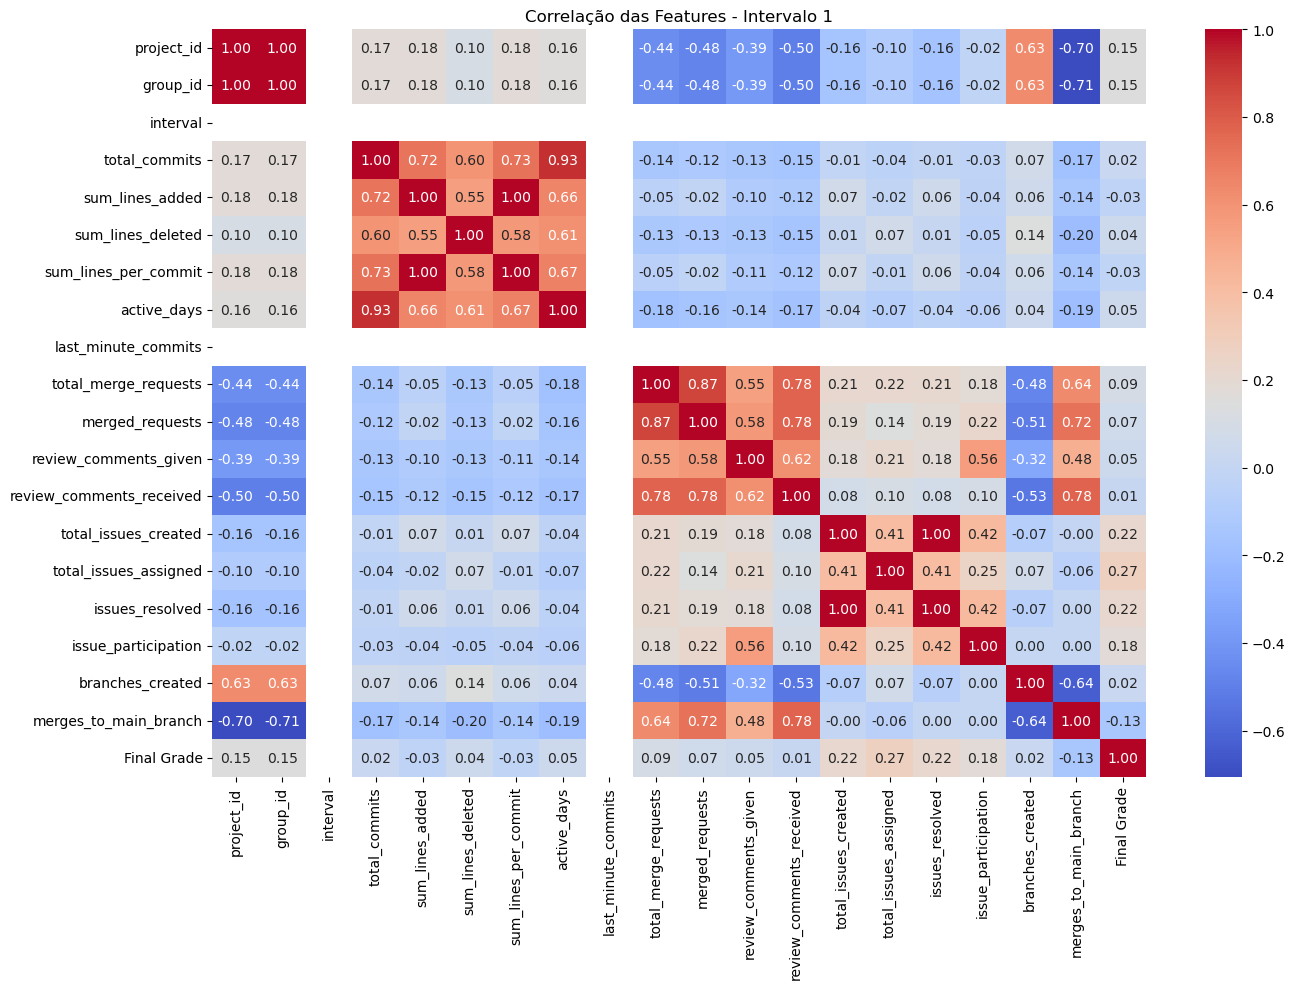

Features removidas por serem constantes/quase constantes: ['interval', 'last_minute_commits']


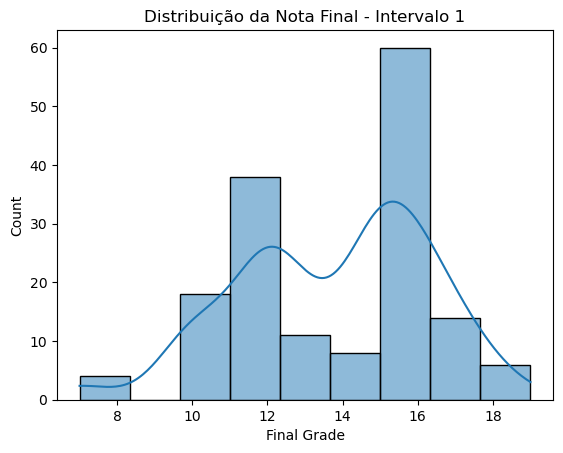

Scores das Features - Intervalo 1:
total_issues_assigned       12.824194
total_issues_created         7.957945
issues_resolved              7.790965
issue_participation          5.004964
merges_to_main_branch        2.816236
total_merge_requests         1.407040
merged_requests              0.714623
active_days                  0.325574
review_comments_given        0.319050
sum_lines_deleted            0.290064
sum_lines_added              0.124382
sum_lines_per_commit         0.101979
total_commits                0.073755
review_comments_received     0.026313
dtype: float64
Top-8 features - Intervalo 1: ['active_days', 'total_merge_requests', 'merged_requests', 'total_issues_created', 'total_issues_assigned', 'issues_resolved', 'issue_participation', 'merges_to_main_branch']

Avaliação do Modelo Random Forest - Intervalo 1:
R²: -0.24326794982886213
MAE: 2.365257472367513
MSE: 8.55596605707421
Linear R² - Intervalo 1: 0.005649603037629514
Linear MAE - Intervalo 1: 2.1845512181888855
Li

,project_id,group_id,mention_handle,interval,total_commits,sum_lines_added,sum_lines_deleted,sum_lines_per_commit,active_days,last_minute_commits,...,merged_requests,review_comments_given,review_comments_received,total_issues_created,total_issues_assigned,issues_resolved,issue_participation,branches_created,merges_to_main_branch,Final Grade
count,2.160000e+02,2.160000e+02,216,216.0,216.000000,216.000000,216.000000,216.000000,216.000000,216.0,...,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000
unique,NaN,NaN,210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,crism17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5.599755e+07,8.343860e+07,NaN,2.0,5.754630,752.328704,114.976852,867.305556,1.175926,0.0,...,1.824074,12.523148,13.134259,4.782407,4.268519,4.712963,8.421296,37.569444,58.648148,13.527778
std,5.618449e+06,9.677706e+06,NaN,0.0,13.298364,4551.116667,706.164771,4692.664752,2.554808,0.0,...,2.858943,35.837351,22.226645,6.488908,5.715107,6.423867,13.026746,36.073630,65.832814,3.114731
min,5.052158e+07,7.404790e+07,NaN,2.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000
25%,5.055425e+07,7.404790e+07,NaN,2.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,1.750000,0.000000,2.000000,2.000000,10.000000,12.000000
50%,5.055433e+07,7.404790e+07,NaN,2.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,1.000000,1.000000,1.000000,2.000000,3.000000,2.000000,6.000000,42.000000,31.000000,14.000000
75%,6.176092e+07,9.336591e+07,NaN,2.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,3.000000,13.000000,21.000000,7.000000,5.250000,7.000000,10.000000,81.000000,158.000000,16.000000


Valores em falta por coluna:
project_id                  0
group_id                    0
mention_handle              0
interval                    0
total_commits               0
sum_lines_added             0
sum_lines_deleted           0
sum_lines_per_commit        0
active_days                 0
last_minute_commits         0
total_merge_requests        0
merged_requests             0
review_comments_given       0
review_comments_received    0
total_issues_created        0
total_issues_assigned       0
issues_resolved             0
issue_participation         0
branches_created            0
merges_to_main_branch       0
Final Grade                 0
dtype: int64
Correlação com Final Grade:
Final Grade                 1.000000
issues_resolved             0.373053
total_issues_created        0.365430
issue_participation         0.327475
total_issues_assigned       0.312501
group_id                    0.218422
project_id                  0.218082
total_merge_requests        0.111974
merg

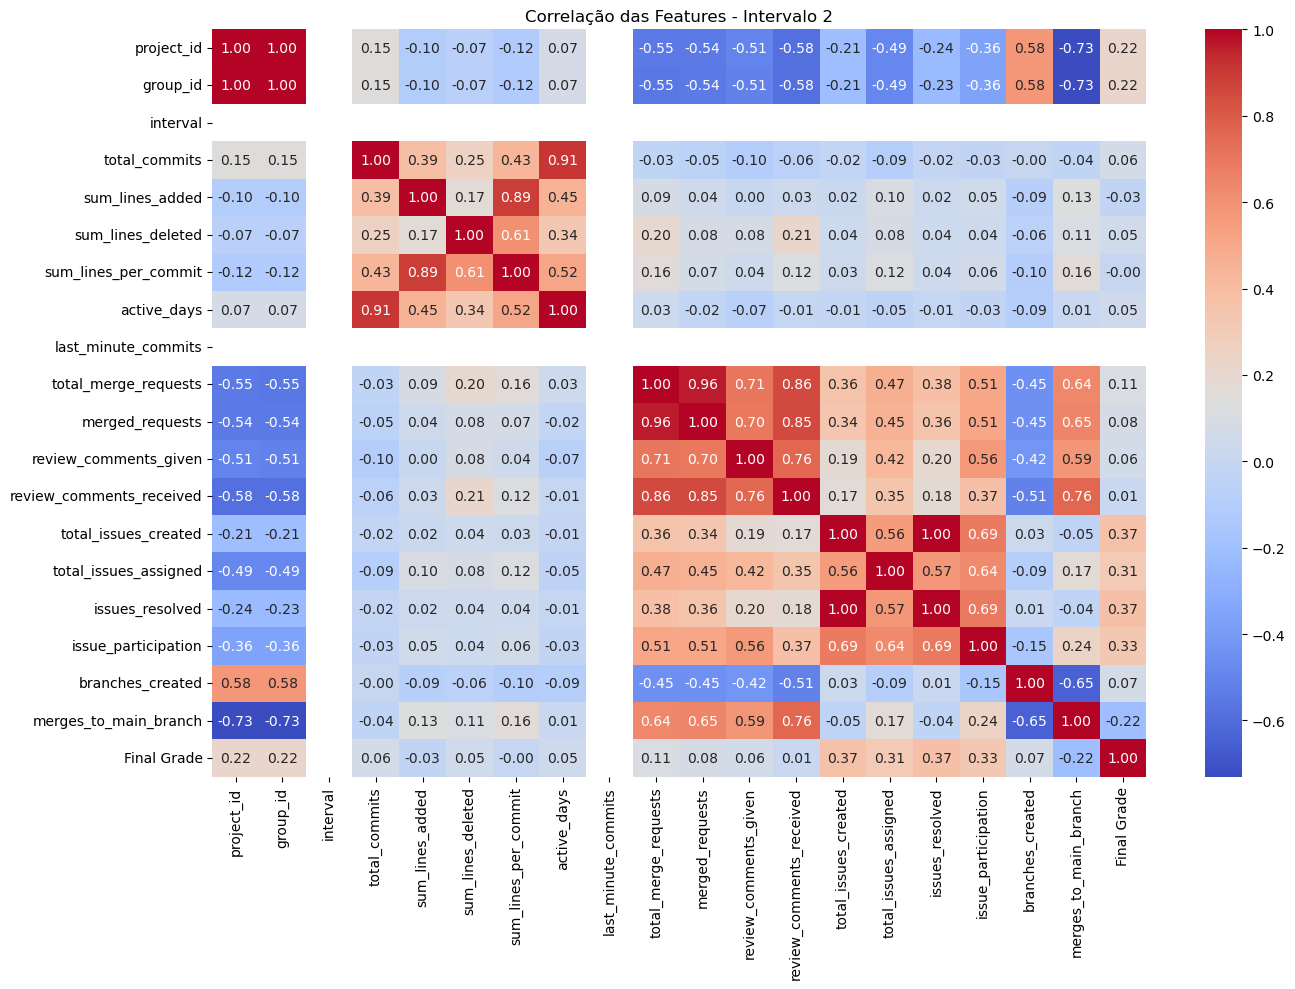

Features removidas por serem constantes/quase constantes: ['interval', 'last_minute_commits']


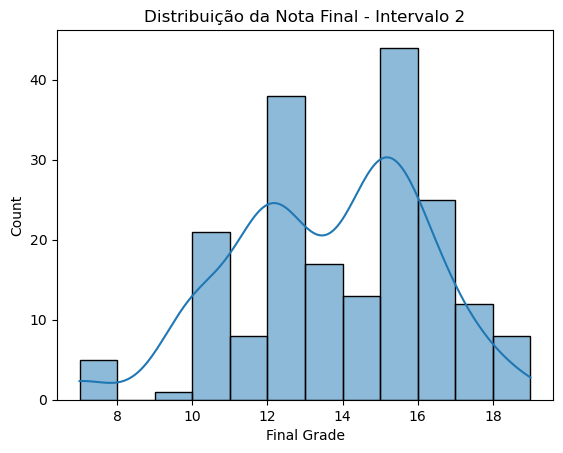

Scores das Features - Intervalo 2:
issues_resolved             30.716890
total_issues_created        29.282765
issue_participation         22.823094
total_issues_assigned       20.562942
merges_to_main_branch        9.239511
total_merge_requests         2.412497
merged_requests              1.299627
total_commits                0.735251
review_comments_given        0.711859
sum_lines_deleted            0.545308
active_days                  0.409872
sum_lines_added              0.213885
review_comments_received     0.030096
sum_lines_per_commit         0.000737
dtype: float64
Top-8 features - Intervalo 2: ['total_commits', 'total_merge_requests', 'merged_requests', 'total_issues_created', 'total_issues_assigned', 'issues_resolved', 'issue_participation', 'merges_to_main_branch']

Avaliação do Modelo Random Forest - Intervalo 2:
R²: 0.34214578219389613
MAE: 1.7298669108669107
MSE: 4.786203007391418
Linear R² - Intervalo 2: 0.1595604034461926
Linear MAE - Intervalo 2: 1.896369168358894
Li

,project_id,group_id,mention_handle,interval,total_commits,sum_lines_added,sum_lines_deleted,sum_lines_per_commit,active_days,last_minute_commits,...,merged_requests,review_comments_given,review_comments_received,total_issues_created,total_issues_assigned,issues_resolved,issue_participation,branches_created,merges_to_main_branch,Final Grade
count,2.250000e+02,2.250000e+02,225,225.0,225.000000,225.000000,225.000000,225.000000,225.000000,225.0,...,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000
unique,NaN,NaN,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,crism17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5.612847e+07,8.366398e+07,NaN,3.0,9.688889,4452.226667,475.102222,4927.328889,2.026667,0.0,...,3.302222,22.031111,22.760000,10.257778,8.720000,9.226667,21.897778,37.764444,101.502222,13.395556
std,5.619963e+06,9.680446e+06,NaN,0.0,24.818108,30563.664251,3253.421740,31705.035620,4.480035,0.0,...,4.384148,55.050658,34.202459,14.811471,8.367497,13.639399,27.232518,36.544769,101.181155,3.223654
min,5.052158e+07,7.404790e+07,NaN,3.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,9.000000,0.000000
25%,5.055425e+07,7.404790e+07,NaN,3.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,2.000000,4.000000,1.000000,8.000000,2.000000,24.000000,12.000000
50%,5.055433e+07,7.404790e+07,NaN,3.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,2.000000,4.000000,7.000000,5.000000,7.000000,4.000000,13.000000,42.000000,54.000000,14.000000
75%,6.176092e+07,9.336591e+07,NaN,3.0,1.000000,1.000000,0.000000,2.000000,1.000000,0.0,...,5.000000,21.000000,32.000000,13.000000,12.000000,12.000000,25.000000,81.000000,208.000000,15.000000


Valores em falta por coluna:
project_id                  0
group_id                    0
mention_handle              0
interval                    0
total_commits               0
sum_lines_added             0
sum_lines_deleted           0
sum_lines_per_commit        0
active_days                 0
last_minute_commits         0
total_merge_requests        0
merged_requests             0
review_comments_given       0
review_comments_received    0
total_issues_created        0
total_issues_assigned       0
issues_resolved             0
issue_participation         0
branches_created            0
merges_to_main_branch       0
Final Grade                 0
dtype: int64
Correlação com Final Grade:
Final Grade                 1.000000
issue_participation         0.456555
total_issues_assigned       0.451967
issues_resolved             0.426384
total_issues_created        0.411450
active_days                 0.126314
group_id                    0.120867
project_id                  0.120580
tota

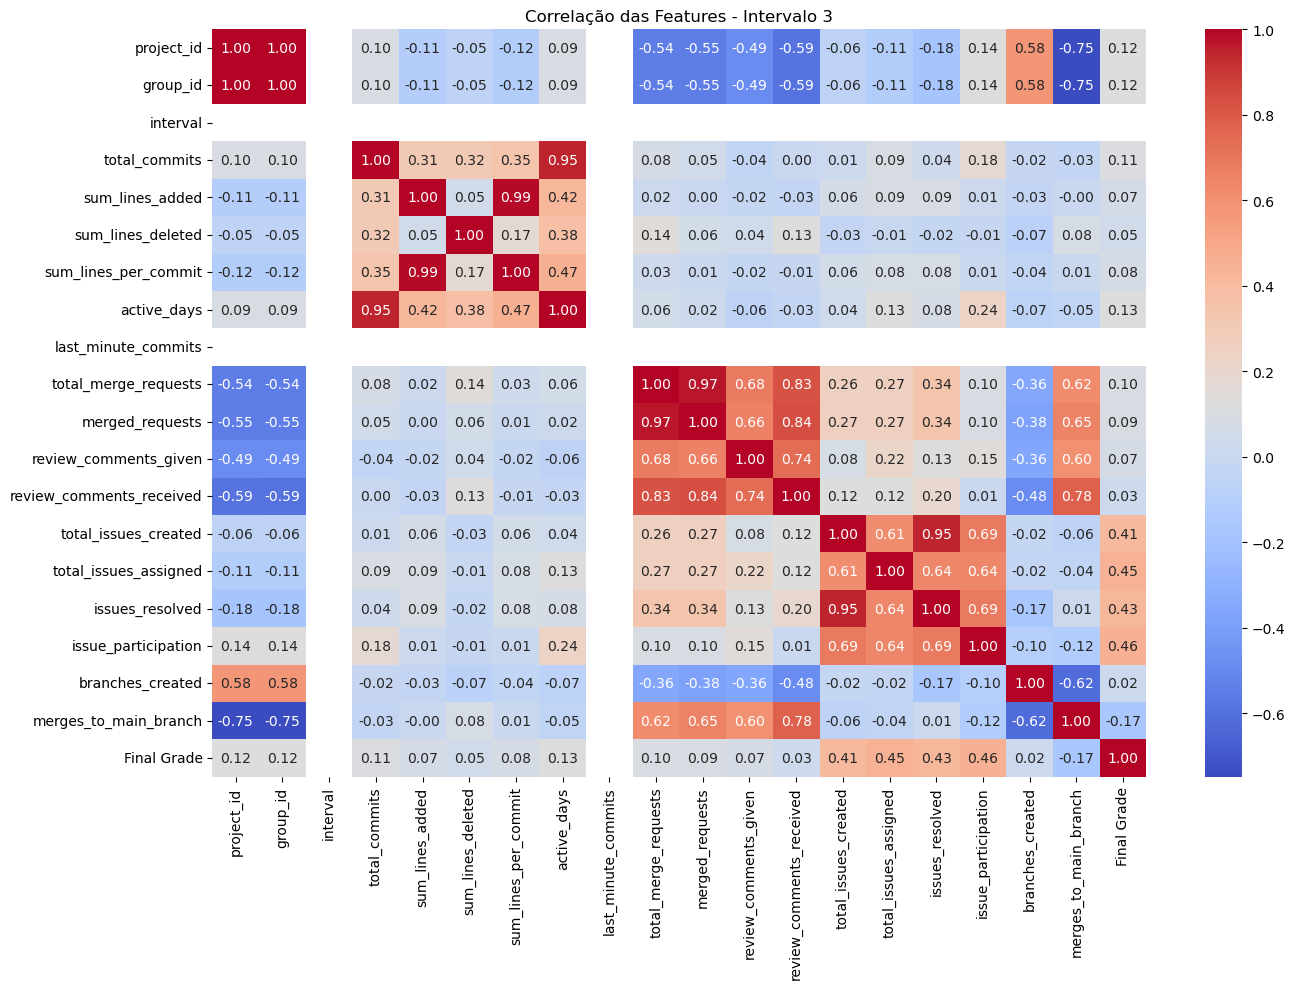

Features removidas por serem constantes/quase constantes: ['interval', 'last_minute_commits']


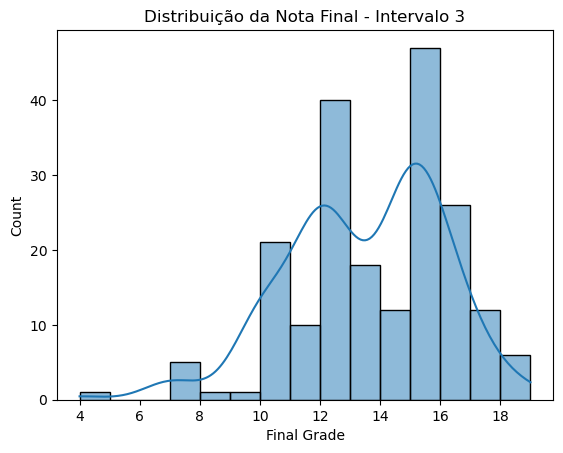

Scores das Features - Intervalo 3:
issue_participation         52.139607
total_issues_assigned       50.829533
issues_resolved             43.995522
total_issues_created        40.350537
merges_to_main_branch        5.661990
active_days                  3.210371
total_commits                2.257457
total_merge_requests         1.844281
merged_requests              1.712096
sum_lines_per_commit         1.168204
review_comments_given        1.049919
sum_lines_added              1.010461
sum_lines_deleted            0.506313
review_comments_received     0.125147
dtype: float64
Top-8 features - Intervalo 3: ['total_commits', 'active_days', 'total_merge_requests', 'total_issues_created', 'total_issues_assigned', 'issues_resolved', 'issue_participation', 'merges_to_main_branch']

Avaliação do Modelo Random Forest - Intervalo 3:
R²: 0.29176988402885584
MAE: 1.67325
MSE: 4.8473925
Linear R² - Intervalo 3: 0.284797659971169
Linear MAE - Intervalo 3: 1.6984603745290001
Linear MSE - Intervalo 3:

,project_id,group_id,mention_handle,interval,total_commits,sum_lines_added,sum_lines_deleted,sum_lines_per_commit,active_days,last_minute_commits,...,merged_requests,review_comments_given,review_comments_received,total_issues_created,total_issues_assigned,issues_resolved,issue_participation,branches_created,merges_to_main_branch,Final Grade
count,2.250000e+02,2.250000e+02,225,225.0,225.000000,2.250000e+02,225.000000,2.250000e+02,225.000000,225.0,...,225.000000,225.0000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000
unique,NaN,NaN,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,crism17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5.612847e+07,8.366398e+07,NaN,4.0,13.715556,1.139969e+04,720.968889,1.212066e+04,3.026667,0.0,...,5.208889,33.5600,34.626667,15.644444,13.826667,13.617778,31.688889,37.764444,158.733333,13.395556
std,5.619963e+06,9.680446e+06,NaN,0.0,36.404584,8.604149e+04,4131.421101,8.754354e+04,6.795429,0.0,...,6.565325,78.0318,49.980650,19.920776,11.548469,17.759445,35.430403,36.544769,146.807393,3.223654
min,5.052158e+07,7.404790e+07,NaN,4.0,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,...,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,12.000000,0.000000
25%,5.055425e+07,7.404790e+07,NaN,4.0,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,...,0.000000,1.0000,0.000000,5.000000,7.000000,3.000000,13.000000,2.000000,44.000000,12.000000
50%,5.055433e+07,7.404790e+07,NaN,4.0,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,...,3.000000,10.0000,12.000000,8.000000,12.000000,7.000000,19.000000,42.000000,104.000000,14.000000
75%,6.176092e+07,9.336591e+07,NaN,4.0,2.000000,2.000000e+00,0.000000,2.000000e+00,1.000000,0.0,...,7.000000,36.0000,50.000000,20.000000,19.000000,18.000000,39.000000,81.000000,278.000000,15.000000


Valores em falta por coluna:
project_id                  0
group_id                    0
mention_handle              0
interval                    0
total_commits               0
sum_lines_added             0
sum_lines_deleted           0
sum_lines_per_commit        0
active_days                 0
last_minute_commits         0
total_merge_requests        0
merged_requests             0
review_comments_given       0
review_comments_received    0
total_issues_created        0
total_issues_assigned       0
issues_resolved             0
issue_participation         0
branches_created            0
merges_to_main_branch       0
Final Grade                 0
dtype: int64
Correlação com Final Grade:
Final Grade                 1.000000
issue_participation         0.497495
issues_resolved             0.485602
total_issues_assigned       0.480638
total_issues_created        0.473280
group_id                    0.130117
project_id                  0.129803
active_days                 0.116922
tota

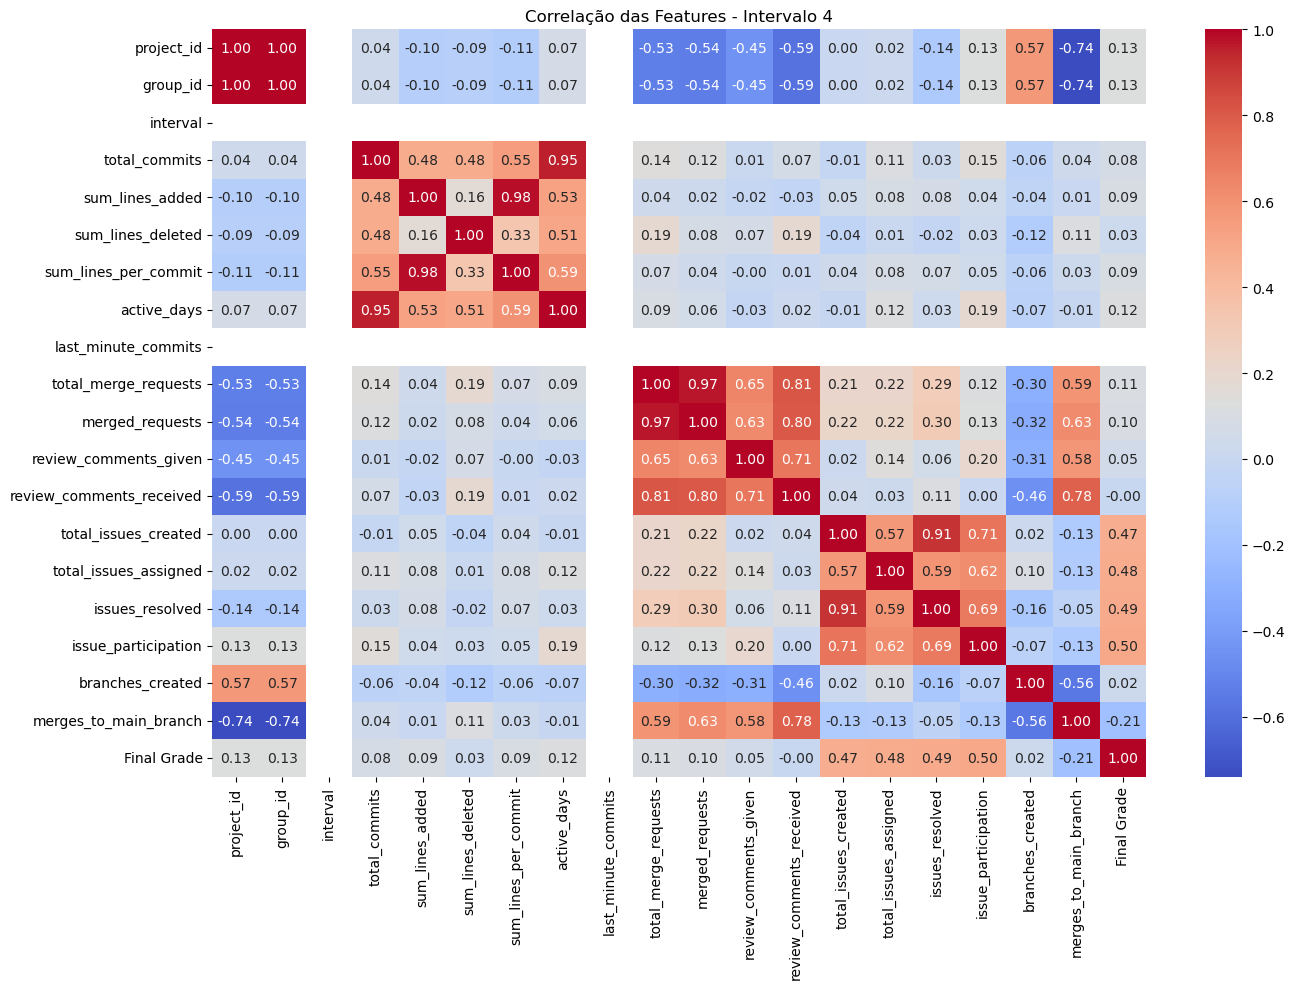

Features removidas por serem constantes/quase constantes: ['interval', 'last_minute_commits']


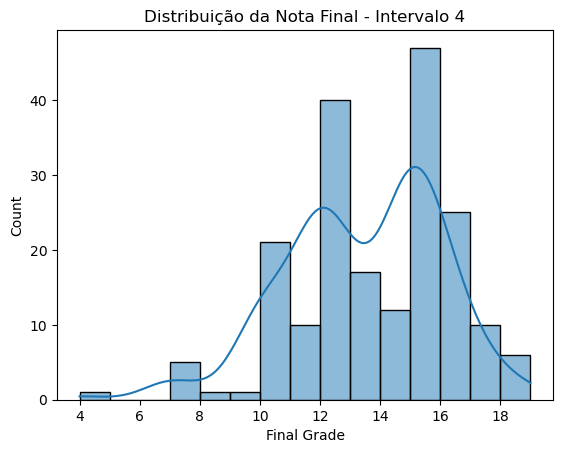

Scores das Features - Intervalo 4:
issue_participation         63.807760
issues_resolved             59.863250
total_issues_assigned       58.280035
total_issues_created        55.998181
merges_to_main_branch        8.704957
active_days                  2.688881
total_merge_requests         2.202803
merged_requests              1.992907
sum_lines_per_commit         1.677470
sum_lines_added              1.625123
total_commits                1.336178
review_comments_given        0.564371
sum_lines_deleted            0.187522
review_comments_received     0.004657
dtype: float64
Top-8 features - Intervalo 4: ['active_days', 'total_merge_requests', 'merged_requests', 'total_issues_created', 'total_issues_assigned', 'issues_resolved', 'issue_participation', 'merges_to_main_branch']

Avaliação do Modelo Random Forest - Intervalo 4:
R²: 0.4165039897547038
MAE: 1.46425
MSE: 3.7019175000000004
Linear R² - Intervalo 4: 0.3500435928671233
Linear MAE - Intervalo 4: 1.439000815109074
Linear MSE - In

,project_id,group_id,mention_handle,interval,total_commits,sum_lines_added,sum_lines_deleted,sum_lines_per_commit,active_days,last_minute_commits,...,merged_requests,review_comments_given,review_comments_received,total_issues_created,total_issues_assigned,issues_resolved,issue_participation,branches_created,merges_to_main_branch,Final Grade
count,2.250000e+02,2.250000e+02,225,225.0,225.000000,2.250000e+02,225.000000,2.250000e+02,225.000000,225.0,...,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000
unique,NaN,NaN,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,crism17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5.612847e+07,8.366398e+07,NaN,5.0,16.866667,1.346272e+04,3794.155556,1.725687e+04,3.782222,0.0,...,6.351111,40.760000,41.848889,18.097778,16.164444,15.333333,35.284444,37.764444,191.186667,13.395556
std,5.619963e+06,9.680446e+06,NaN,0.0,46.416592,8.858686e+04,39126.127900,9.860593e+04,8.360283,0.0,...,7.644227,84.570581,54.822883,22.976293,13.267663,19.934715,38.709991,36.544769,153.972663,3.223654
min,5.052158e+07,7.404790e+07,NaN,5.0,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,16.000000,0.000000
25%,5.055425e+07,7.404790e+07,NaN,5.0,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,...,0.000000,2.000000,0.000000,5.000000,8.000000,4.000000,14.000000,2.000000,50.000000,12.000000
50%,5.055433e+07,7.404790e+07,NaN,5.0,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,...,4.000000,14.000000,19.000000,11.000000,13.000000,9.000000,22.000000,42.000000,190.000000,14.000000
75%,6.176092e+07,9.336591e+07,NaN,5.0,3.000000,6.000000e+00,0.000000,7.000000e+00,2.000000,0.0,...,9.000000,51.000000,62.000000,24.000000,21.000000,20.000000,46.000000,81.000000,299.000000,15.000000


Valores em falta por coluna:
project_id                  0
group_id                    0
mention_handle              0
interval                    0
total_commits               0
sum_lines_added             0
sum_lines_deleted           0
sum_lines_per_commit        0
active_days                 0
last_minute_commits         0
total_merge_requests        0
merged_requests             0
review_comments_given       0
review_comments_received    0
total_issues_created        0
total_issues_assigned       0
issues_resolved             0
issue_participation         0
branches_created            0
merges_to_main_branch       0
Final Grade                 0
dtype: int64
Correlação com Final Grade:
Final Grade                 1.000000
issue_participation         0.526834
issues_resolved             0.508867
total_issues_assigned       0.497672
total_issues_created        0.477409
merged_requests             0.162548
total_merge_requests        0.158061
active_days                 0.111318
grou

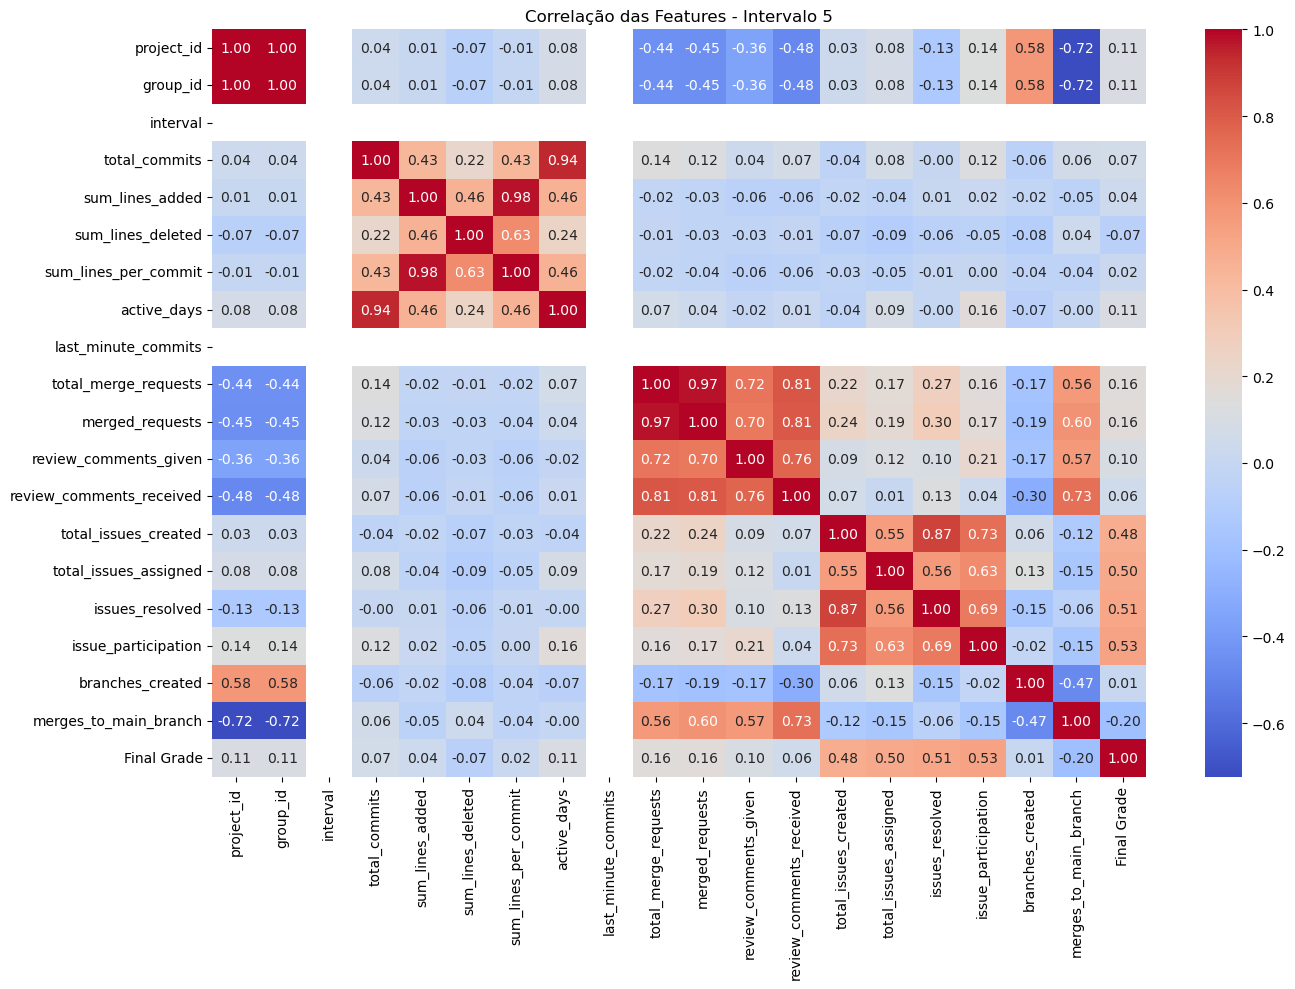

Features removidas por serem constantes/quase constantes: ['interval', 'last_minute_commits']


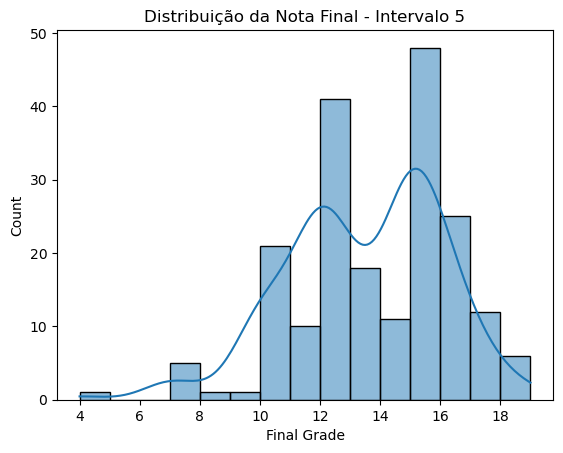

Scores das Features - Intervalo 5:
issue_participation         76.069109
issues_resolved             69.186995
total_issues_assigned       65.185049
total_issues_created        58.449775
merges_to_main_branch        8.557691
merged_requests              5.373480
total_merge_requests         5.073412
active_days                  2.484330
review_comments_given        2.113927
total_commits                1.002863
sum_lines_deleted            0.926582
review_comments_received     0.638139
sum_lines_added              0.363121
sum_lines_per_commit         0.096444
dtype: float64
Top-8 features - Intervalo 5: ['active_days', 'total_merge_requests', 'merged_requests', 'total_issues_created', 'total_issues_assigned', 'issues_resolved', 'issue_participation', 'merges_to_main_branch']

Avaliação do Modelo Random Forest - Intervalo 5:
R²: 0.5223426402361873
MAE: 1.4937500000000001
MSE: 3.5391425000000005
Linear R² - Intervalo 5: 0.26944813511358245
Linear MAE - Intervalo 5: 1.9345774422322919
Li

In [13]:
### EDA Reforçada para Análise de Dados de Estudantes
# Estatísticas, Outliers, Correlação para todos os intervalos

# Loop para processar todos os intervalos
for interval in range(1, 6): 
    print(f"Processando intervalo {interval}...")

    file_path = f"student_features_interval_{interval}.csv"
    df = pd.read_csv(file_path)

    # 1. Estatísticas Básicas
    print("Estatísticas Descritivas:")
    display(df.describe(include='all'))

    # 2. Valores em falta
    print("Valores em falta por coluna:")
    print(df.isnull().sum())

    # 3. Outliers com Z-Score
    cols_to_filter = ['sum_lines_per_commit', 'sum_lines_added', 'total_commits', 
                      'total_merge_requests', 'total_issues_created', 
                      'review_comments_given', 'review_comments_received', 
                      'active_days', 'merged_requests', 'Final Grade']
    # Calcular o Z-Score e filtrar os outliers
    z_scores = df[cols_to_filter].apply(zscore)
    df = df[(np.abs(z_scores) <= 3).all(axis=1)]

    # 4. Correlação com a nota final
    if "Final Grade" in df.columns:
        correlations = df.corr(numeric_only=True)["Final Grade"].sort_values(ascending=False)
        print("Correlação com Final Grade:")
        print(correlations)

        # Mapa de calor
        plt.figure(figsize=(14, 10))
        sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
        plt.title(f"Correlação das Features - Intervalo {interval}")
        plt.tight_layout()
        plt.show()

    # 5. Remover colunas constantes
    nunique = df.nunique()
    cols_to_drop = nunique[nunique <= 1].index
    df.drop(columns=cols_to_drop, inplace=True)
    print("Features removidas por serem constantes/quase constantes:", cols_to_drop.tolist())

    # Visualização da distribuição da nota final
    sns.histplot(df["Final Grade"], kde=True)
    plt.title(f"Distribuição da Nota Final - Intervalo {interval}")
    plt.show()

    # 6. Preparar X e y
    df = df.dropna(subset=["Final Grade"])
    X = df.drop(columns=["Final Grade", "project_id", "group_id", "mention_handle", "interval", "last_minute_commits", "branches_created"], errors="ignore")
    y = df["Final Grade"]

    # 7. Normalizar
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # 8. Seleção de Features (todos as pontuações)
    selector = SelectKBest(score_func=f_regression, k='all')
    X_selected_all = selector.fit_transform(X_scaled, y)
    scores = pd.Series(selector.scores_, index=X.columns)
    print(f"Scores das Features - Intervalo {interval}:")
    print(scores.sort_values(ascending=False))

    # Só as top-8:
    topk = 8
    selector_k = SelectKBest(score_func=f_regression, k=topk)
    X_selected = selector_k.fit_transform(X_scaled, y)
    selected_columns = X.columns[selector_k.get_support()]
    print(f"Top-8 features - Intervalo {interval}:", selected_columns.tolist())

    # 9. Dividir treino/teste
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

    # 10. Treinar Random Forest
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)

    # 11. Avaliar Random Forest
    print(f"\nAvaliação do Modelo Random Forest - Intervalo {interval}:")
    print("R²:", r2_score(y_test, y_pred))
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("MSE:", mean_squared_error(y_test, y_pred))

    # 12. Treinar e Avaliar Regressão Linear
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    print(f"Linear R² - Intervalo {interval}:", r2_score(y_test, lr.predict(X_test)))
    print(f"Linear MAE - Intervalo {interval}:", mean_absolute_error(y_test, lr.predict(X_test)))
    print(f"Linear MSE - Intervalo {interval}:", mean_squared_error(y_test, lr.predict(X_test)))

    # 13. Criar novas features
    df['issues_per_day']    = df['total_issues_created'] / (df['active_days'] + 1)
    df['merge_rate']        = df['merged_requests']   / (df['total_merge_requests'] + 1)
    df['review_balance']    = df['review_comments_given'] - df['review_comments_received']
    df['commit_efficiency'] = df['sum_lines_per_commit'] * df['total_commits']

    print(f"Processamento completo para o intervalo {interval}.")
    print("-" * 50)


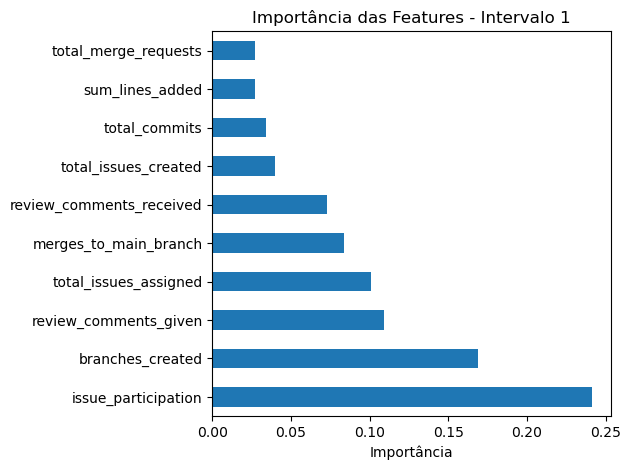

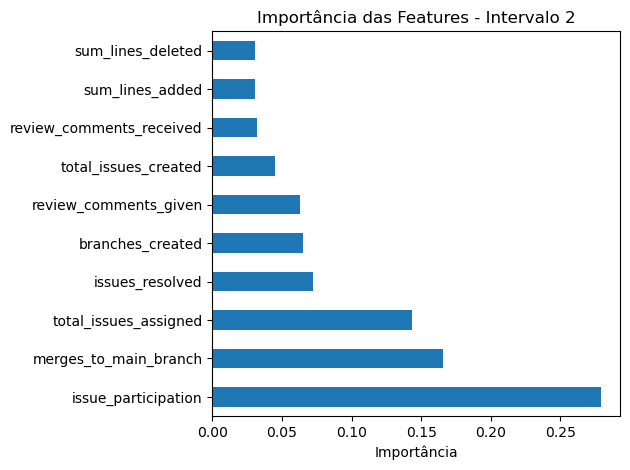

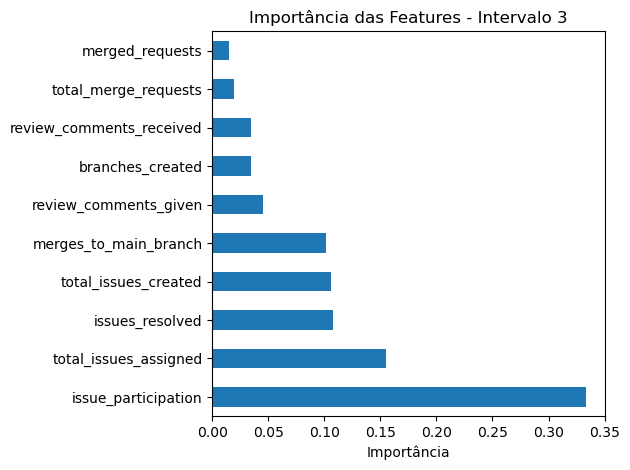

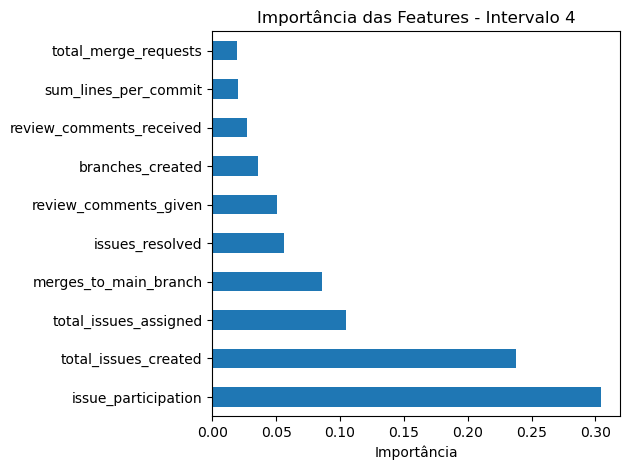

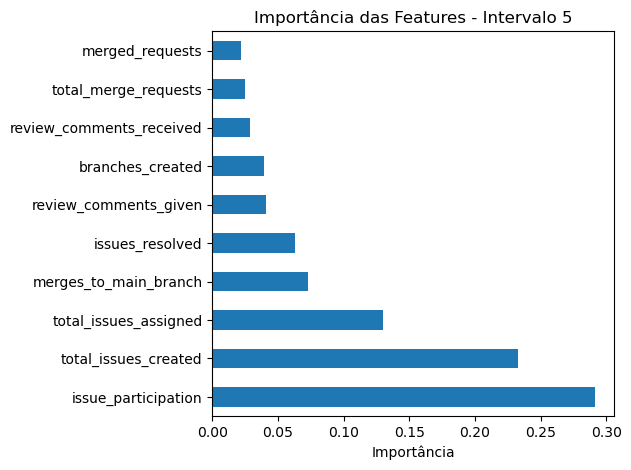

In [14]:

for i in range(1, 6):
    df = pd.read_csv(f"student_features_interval_{i}.csv")
    X = df.drop(columns=["Final Grade", "project_id", "group_id", "mention_handle", "interval"], errors='ignore')
    y = df["Final Grade"]
    
    model = RandomForestRegressor(n_estimators=50, random_state=42)
    model.fit(X, y)
    importances = pd.Series(model.feature_importances_, index=X.columns)
    importances.nlargest(10).plot(kind='barh', title=f"Importância das Features - Intervalo {i}")
    plt.xlabel("Importância")
    plt.tight_layout()
    plt.show()


In [15]:
## Modelo Random Forest com seleção automática de features
#Usa GridSearchCV para otimizar hiperparâmetros e guarda as métricas de desempenho

# Recolher os ficheiros
all_files = sorted(glob.glob("student_features_interval_*.csv"))

results_grid = []

# Param grid para Random Forest
param_grid = {
    "regressor__n_estimators": [50, 100, 200],
    "regressor__max_depth": [None, 5, 10],
    "regressor__min_samples_split": [2, 5],
}

# Loop pelos intervalos
for i, file_path in enumerate(all_files, start=1):
    print("="*80)
    print(f"Interval {i}: {file_path}")
    
    # 1. Carregar dados
    df = pd.read_csv(file_path).dropna(subset=["Final Grade"])
    X = df.drop(columns=["Final Grade", "project_id", "group_id", "mention_handle", "interval"], errors="ignore")
    y = df["Final Grade"]

    # 2. Pipeline com SelectKBest + StandardScaler + Random Forest
    pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("selector", SelectKBest(score_func=f_regression, k=min(8, X.shape[1]))),
        ("regressor", RandomForestRegressor(random_state=42))
    ])

    # 3. Grid Search com Cross-Validation
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="r2", n_jobs=-1)
    grid_search.fit(X, y)
    
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # 4. Avaliação em holdout (20%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    best_model.fit(X_train, y_train)
    preds = best_model.predict(X_test)

    # 5. Exibir Features Selecionadas
    selector = best_model.named_steps['selector']
    selected_features = X.columns[selector.get_support()]
    print(f"Features selecionadas para o Intervalo {i}: {', '.join(selected_features)}")

    # 6. Armazenar resultados
    results_grid.append({
        "Interval": i,
        "Best Params": best_params,
        "MSE": mean_squared_error(y_test, preds),
        "MAE": mean_absolute_error(y_test, preds),
        "R2": r2_score(y_test, preds)
    })

# Mostrar resultados
results_grid_df = pd.DataFrame(results_grid)
display(results_grid_df)


Interval 1: student_features_interval_1.csv
Features selecionadas para o Intervalo 1: total_merge_requests, merged_requests, review_comments_given, total_issues_created, total_issues_assigned, issues_resolved, issue_participation, merges_to_main_branch
Interval 2: student_features_interval_2.csv
Features selecionadas para o Intervalo 2: total_merge_requests, merged_requests, review_comments_given, review_comments_received, total_issues_created, total_issues_assigned, issues_resolved, issue_participation
Interval 3: student_features_interval_3.csv
Features selecionadas para o Intervalo 3: total_merge_requests, merged_requests, review_comments_given, review_comments_received, total_issues_created, total_issues_assigned, issues_resolved, issue_participation
Interval 4: student_features_interval_4.csv
Features selecionadas para o Intervalo 4: total_merge_requests, merged_requests, review_comments_given, review_comments_received, total_issues_created, total_issues_assigned, issues_resolved,

,Interval,Best Params,MSE,MAE,R2
0,1,"{'regressor__max_depth': 5, 'regressor__min_sa...",12.705732,2.451787,-0.116206
1,2,"{'regressor__max_depth': 5, 'regressor__min_sa...",8.921725,1.993182,0.107597
2,3,"{'regressor__max_depth': 5, 'regressor__min_sa...",7.485651,1.896915,0.036580
3,4,"{'regressor__max_depth': 5, 'regressor__min_sa...",8.112930,2.084537,-0.521174
4,5,"{'regressor__max_depth': 5, 'regressor__min_sa...",7.584836,2.070015,-0.418741


In [16]:
# Modelos ensemble (Random Forest, Gradient Boosting, Ridge)

os.makedirs("EnsembleModels", exist_ok=True)

# Guarda resultados
results = []

# Loop pelos 5 intervalos
for i in range(1, 6):
    print(f"\nIntervalo {i}")
    
    # Carregar dados
    df = pd.read_csv(f"student_features_interval_{i}.csv")
    
    X = df.drop(columns=["Final Grade", "project_id", "group_id", "mention_handle", "interval"])
    y = df["Final Grade"]
    
    # Split train/test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Pré-processamento + modelo ensemble
    pipeline = Pipeline([
        ('select', SelectKBest(score_func=f_regression, k='all')),
        ('scale', StandardScaler()),
        ('ensemble', VotingRegressor(estimators=[
            ('rf', RandomForestRegressor(n_estimators=50, random_state=42)),
            ('gb', GradientBoostingRegressor(n_estimators=50, random_state=42)),
            ('ridge', Ridge(alpha=1.0))
        ]))
    ])
    
    # Treinar
    pipeline.fit(X_train, y_train)
    
    # Avaliar
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"MSE: {mse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}")
    
    # Guardar modelo
    model_path = f"EnsembleModels/Ensemble_interval{i}.pkl"
    joblib.dump(pipeline, model_path)
    print(f"Modelo guardado em: {model_path}")
    
    # Guardar resultados
    results.append({
        'Interval': i,
        'MSE': mse,
        'MAE': mae,
        'R2': r2
    })

# Mostrar tabela final de resultados
results_df = pd.DataFrame(results)
display(results_df)



Intervalo 1
MSE: 10.8176, MAE: 2.2446, R²: 0.0497
Modelo guardado em: EnsembleModels/Ensemble_interval1.pkl

Intervalo 2
MSE: 7.3537, MAE: 1.7652, R²: 0.2644
Modelo guardado em: EnsembleModels/Ensemble_interval2.pkl

Intervalo 3
MSE: 6.3518, MAE: 1.7700, R²: 0.1825
Modelo guardado em: EnsembleModels/Ensemble_interval3.pkl

Intervalo 4
MSE: 7.1189, MAE: 1.9616, R²: -0.3348
Modelo guardado em: EnsembleModels/Ensemble_interval4.pkl

Intervalo 5
MSE: 6.8600, MAE: 1.8743, R²: -0.2832
Modelo guardado em: EnsembleModels/Ensemble_interval5.pkl


,Interval,MSE,MAE,R2
0,1,10.817640,2.244561,0.049664
1,2,7.353707,1.765204,0.264439
2,3,6.351750,1.770042,0.182516
3,4,7.118914,1.961616,-0.334796
4,5,6.860050,1.874305,-0.283170


In [17]:
# Correlação com a nota final para o intervalo 4 e  5, para ver as features mais relevantes
for i in [4, 5]:
    df = pd.read_csv(f"student_features_interval_{i}.csv")
    corr = df.corr(numeric_only=True)["Final Grade"].drop("Final Grade").sort_values(ascending=False)
    print(f"\nTop features do Intervalo {i}:\n", corr.head(10))



Top features do Intervalo 4:
 total_issues_assigned       0.488711
issue_participation         0.454760
issues_resolved             0.433639
total_issues_created        0.423827
total_merge_requests        0.266044
merged_requests             0.263121
review_comments_given       0.217372
review_comments_received    0.192464
active_days                 0.134834
sum_lines_per_commit        0.119919
Name: Final Grade, dtype: float64

Top features do Intervalo 5:
 total_issues_assigned       0.510342
issue_participation         0.468177
issues_resolved             0.434693
total_issues_created        0.427656
merged_requests             0.283656
total_merge_requests        0.282856
review_comments_given       0.224083
review_comments_received    0.200125
active_days                 0.145832
sum_lines_added             0.122026
Name: Final Grade, dtype: float64


In [18]:
# Modelo StackingRegressor a todos os intervalos
# PolynomialFeatures (grau 2) para capturar interações
# Engenharia de features para variáveis compostas


for interval in range(1, 6):
    print(f"\n==== Intervalo {interval} ====")
    df = pd.read_csv(f"student_features_interval_{interval}.csv")

    # === Feature Engineering ===
    df["issues_per_day"] = df["total_issues_created"] / (df["active_days"] + 1)
    df["merge_rate"] = df["merged_requests"] / (df["total_merge_requests"] + 1)
    df["review_balance"] = df["review_comments_given"] - df["review_comments_received"]
    df["commit_efficiency"] = df["sum_lines_added"] / (df["total_commits"] + 1)

    # === Seleção das top-8 features por correlação ===
    corr = df.corr(numeric_only=True)["Final Grade"].abs().sort_values(ascending=False)
    top8 = corr.drop("Final Grade").head(8).index.tolist()
    print("Top-8 features:", top8)

    X = df[top8]
    y = df["Final Grade"]

    # === Pipeline com Polynomial Features ===
    base_models = [
        ('gb', GradientBoostingRegressor(n_estimators=100, random_state=42)),
        ('ridge', Ridge(alpha=1.0)),
    ]
    final_estimator = Ridge()

    from sklearn.ensemble import StackingRegressor
    stack_model = StackingRegressor(estimators=base_models, final_estimator=final_estimator, passthrough=False)

    pipe = Pipeline([
        ("scale", StandardScaler()),
        ("poly", PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)),
        ("stack", stack_model)
    ])

    # Treino e avaliação
    pipe.fit(X, y)
    y_pred = pipe.predict(X)

    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    cv_r2 = cross_val_score(pipe, X, y, scoring="r2", cv=5)

    print(f"Stacking R²: {r2:.4f}  |  MAE: {mae:.4f}  |  MSE: {mse:.4f}")
    print(f"Cross-val R² mean: {cv_r2.mean():.4f} ± {cv_r2.std():.4f}")




==== Intervalo 1 ====
Top-8 features: ['total_issues_created', 'issues_resolved', 'issue_participation', 'issues_per_day', 'total_issues_assigned', 'total_merge_requests', 'merged_requests', 'review_comments_given']
Stacking R²: 0.3425  |  MAE: 1.8642  |  MSE: 6.2249
Cross-val R² mean: 0.0289 ± 0.1054

==== Intervalo 2 ====
Top-8 features: ['issues_resolved', 'total_issues_created', 'issue_participation', 'total_issues_assigned', 'issues_per_day', 'total_merge_requests', 'merged_requests', 'review_comments_given']
Stacking R²: 0.3861  |  MAE: 1.7548  |  MSE: 5.9279
Cross-val R² mean: -0.0469 ± 0.1046

==== Intervalo 3 ====
Top-8 features: ['total_issues_assigned', 'issue_participation', 'issues_resolved', 'total_issues_created', 'issues_per_day', 'total_merge_requests', 'merged_requests', 'review_comments_given']
Stacking R²: 0.5970  |  MAE: 1.4799  |  MSE: 4.1690
Cross-val R² mean: 0.1172 ± 0.1430

==== Intervalo 4 ====
Top-8 features: ['total_issues_assigned', 'issue_participation',


==== Intervalo 1 ====


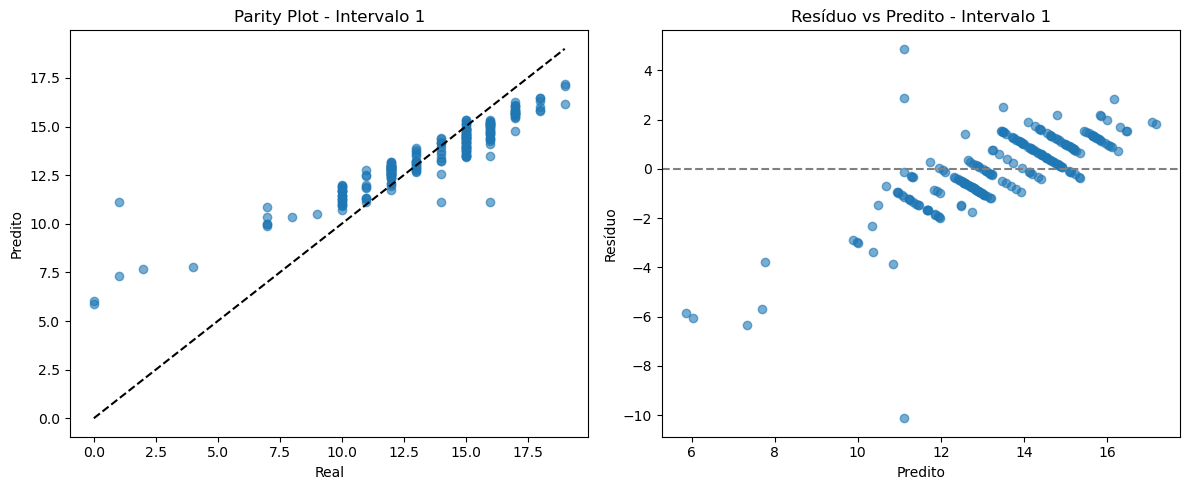


==== Intervalo 2 ====


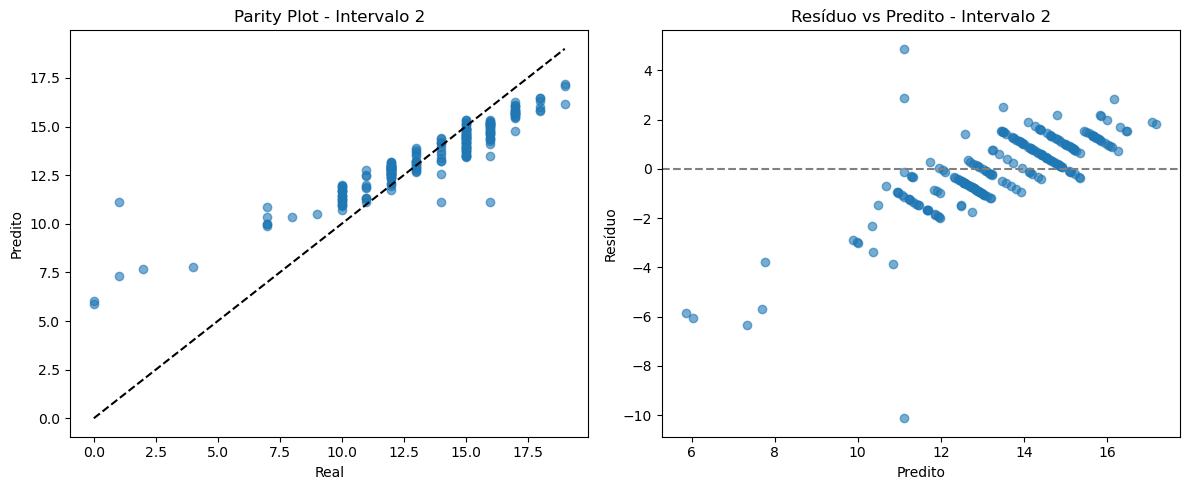


==== Intervalo 3 ====


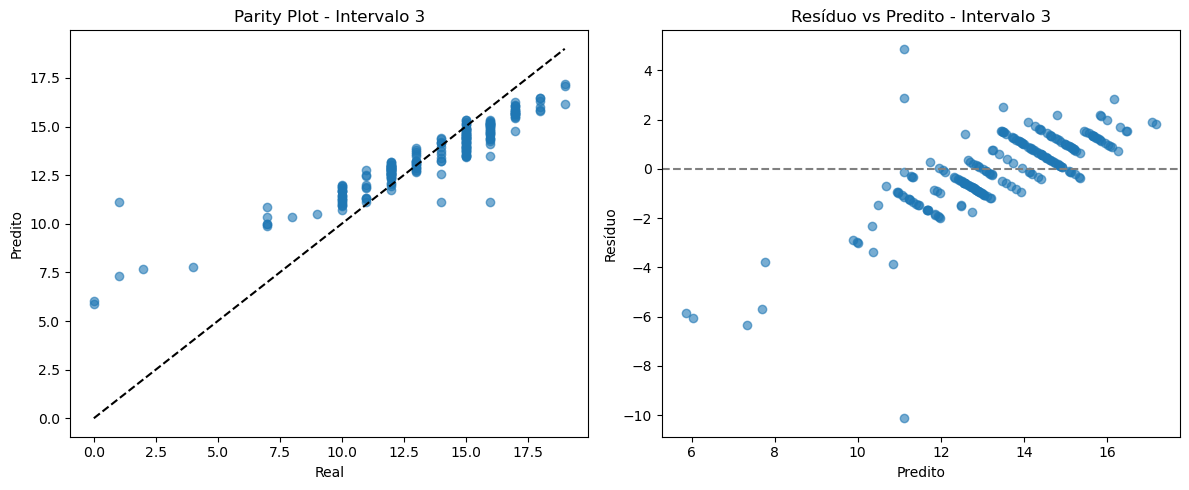


==== Intervalo 4 ====


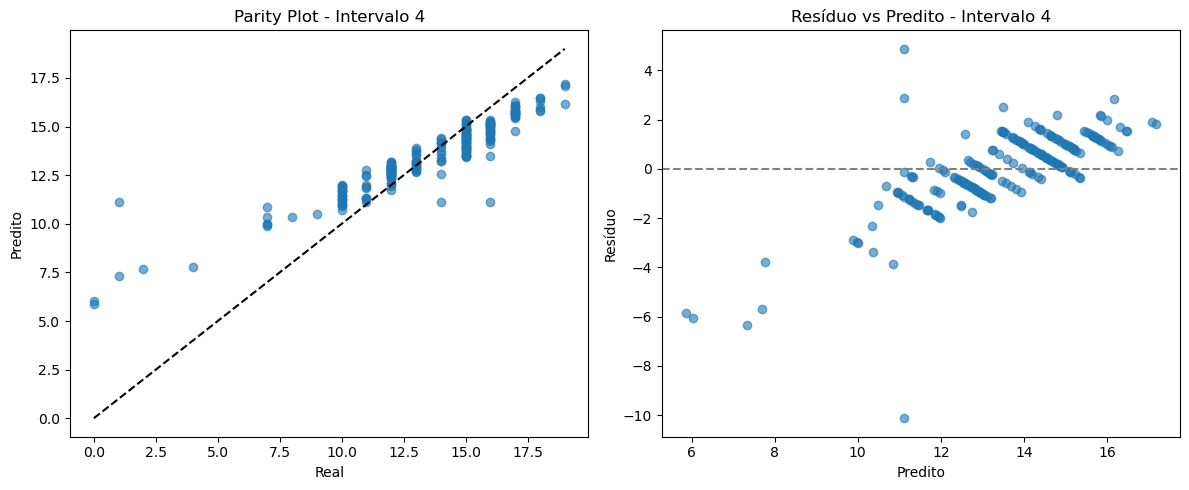


==== Intervalo 5 ====


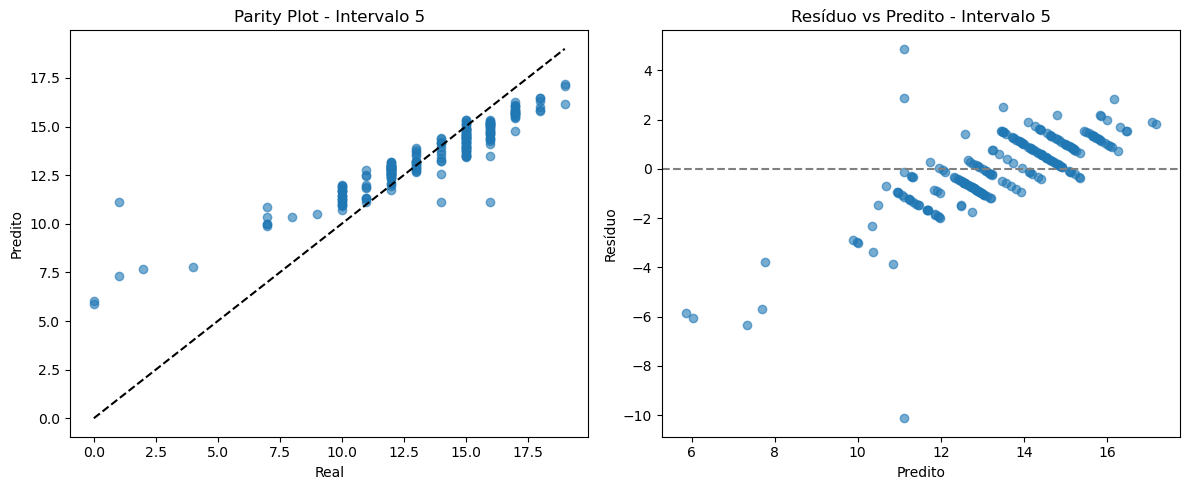

In [19]:
#Parity Plot e Resíduos para os modelos

for interval in range(1, 6):
    print(f"\n==== Intervalo {interval} ====")
    df = pd.read_csv(f"student_features_interval_{interval}.csv")

    # === Gráficos Diagnóstico ===
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    # Parity plot
    axs[0].scatter(y, y_pred, alpha=0.6)
    axs[0].plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
    axs[0].set_title(f"Parity Plot - Intervalo {interval}")
    axs[0].set_xlabel("Real")
    axs[0].set_ylabel("Predito")

    # Resíduos
    resid = y - y_pred
    axs[1].scatter(y_pred, resid, alpha=0.6)
    axs[1].axhline(0, color='gray', linestyle='--')
    axs[1].set_title(f"Resíduo vs Predito - Intervalo {interval}")
    axs[1].set_xlabel("Predito")
    axs[1].set_ylabel("Resíduo")

    plt.tight_layout()
    plt.show()


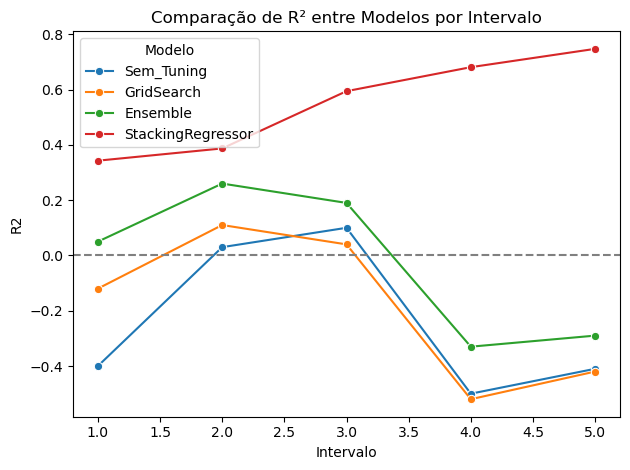

In [20]:
# Estrutura para comparação
df_comp = pd.DataFrame({
    'Intervalo': [1, 2, 3, 4, 5],
    'Sem_Tuning': [-0.40, 0.03, 0.10, -0.50, -0.41],
    'GridSearch': [-0.12, 0.11, 0.04, -0.52, -0.42],
    'Ensemble': [0.05, 0.26, 0.19, -0.33, -0.29],
    'StackingRegressor': [0.3428, 0.3871, 0.5942, 0.6810, 0.7473]
})
df_melted = df_comp.melt(id_vars='Intervalo', var_name='Modelo', value_name='R2')

sns.lineplot(data=df_melted, x='Intervalo', y='R2', hue='Modelo', marker='o')
plt.title("Comparação de R² entre Modelos por Intervalo")
plt.axhline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()
